# Tinkering Notebook for Lecture 1 - Introduction

In this notebook you will see that your Jupyter environment is working, and also try to use reinforcement learning on a simple problem.\
在这个笔记本里，你会看到你的Jupyter环境正在起作用，并且尝试在一个简单的问题上使用强化学习。

# Table of content
* ### [1. Imports](#sec1)
* ### [2. A very short introduction to Reinforcement Learning (RL)](#sec2)
* ### [3. Getting started with Open AI gym](#sec3)
 * #### [3.1 Taxi driver](#sec3_1)
 * #### [3.2 MountainCar environment](#sec3_2)
* ### [4. *Multi-armed bandits](#sec4)
 * #### [4.1 Learn](#sec4_1)
 * #### [4.2 Act](#sec4_2)
 * #### [4.3 Testing MultiarmedBandits](#sec4_3)

# 1. Imports <a id="sec1">

For this notebook you have to import the following packages.

In [2]:
# Packages needed for this assignment
import gym
import gym_bandits # Implements 10-armed bandits from Chapter 2 in the textbook
import numpy as np
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output # Used to clear the ouput of a Jupyter cell.

# 2. A very short introduction to Reinforcement Learning (RL) <a id="sec2">

#### **<font color = blue> Definition </font> Reinforcement Learning**
Reinforcement Learning (RL) is a family of modern machine learning techniques for learning how to make sequential decisions using feedback from real and/or simulated environments.\
强化学习(RL)是一组现代机器学习技术，用于学习如何利用真实和/或模拟环境的反馈做出序贯决策。

In RL the agent (e.g. computer program) interacts with an environment and gets rewards.
The environment could be a physical or chemical system, resource management, traffic light control, advertisement network, a computer game or many other things.
The goal of the agent is typically to maximize the cumulative sum of rewards over some number of sequential actions.
In order to do so, the agent learns from observations in order to improve its future actions.\
在RL中，agent(如计算机程序)与环境交互并获得奖励。
环境可以是物理或化学系统、资源管理、交通信号灯控制、广告网络、电脑游戏或许多其他东西。
agent的目标通常是在一定数量的连续行动中最大化累积奖励的总和。
为了做到这一点，agent从观察中学习，以改进其未来的行为。

Some important concepts in RL:
* __Agent__: The learner and decision maker.
* __Environment__: What the agent interacts with.
* __State__: A state $s \in \mathcal{S}$ is a succint [səkˈsɪŋkt] representation of the environments current state.\
状态$s \in \mathcal{S}$是环境当前状态的简洁（succint）表示。
* __Action__: The agent can take actions $a \in \mathcal{A}$ in order to change the state of the environment.\
agent可以采取行动$a \in \mathcal{A}$来改变环境的状态。
* __Observation__: After each action the agent recieves an observation of the environment. For most of the course we will assume that the agent observs the state $s$.\
在每个动作之后，代理接收到对环境的一个观察。在课程的大部分时间里，我们将假定代理观察状态$s$。
* __Policy__: Rules for how the agent choses the next action given the current state, $a = \pi(s)$.\
给定当前状态，agent如何选择下一个操作的规则$a = \pi(s)$。
* __Reward__: An immediate reward $R(s,a)$ that the agent gets for taking action $a$ in state $s$.\
agent在状态$s$时采取行动$a$所得到的即时报酬$R(s,a)$。

For more discussion on the meaning of these concepts, see Lecture 1 and the course book.

# 3. Getting started with Open AI gym <a id="sec3">

In supervised learning, different methods can be evaluated on static data sets. In RL, however, the algorithms must be tested on interactive (dynamic) environments. This is where OpenAI Gym comes in.\
在监督学习中，不同的方法可以在静态数据集上进行评估。然而，在RL中，算法必须在交互式（动态）环境中进行测试。这就是OpenAI健身房的作用所在。

[OpenAI Gym](http://gym.openai.com) is a toolkit (a set of software tools 配套软件；软件包；工具箱) for comparing RL-algorithms. It contains a wide variety of environments that you can train your agents on, and it is often used for benchmarking new methods in the RL research litterature.\
[OpenAI Gym](http://gym.openai.com)是一个比较RL算法的工具包（toolkit）。它包含了各种各样的环境，您可以在这些环境中培训代理，并且它经常被用于RL研究文献中的新方法的基准测试。

There are also [leaderboards](https://github.com/openai/gym/wiki/Leaderboard) for different gym-environments, showing which methods has been most successful so far.\
还有针对不同gym环境的[排行榜](https://github.com/openai/gym/wiki/Leaderboard)，显示到目前为止哪种方法最成功。

In the exercises, "Tinkering Notebooks", we will make use of OpenAI Gym.\
在“Tinkering笔记本”的练习中，我们将使用OpenAI Gym。

To test your installation of OpenAI gym, and learn about basic usage, we will look at the relatively simple Taxi-environment.\
为了测试OpenAI gym的安装，并了解基本用法，我们将查看相对简单的出租车环境。

## 3.1 Taxi driver <a id="sec3_1">

In this environment there are four locations. 
Your job is to pick up a passenger at one of these locations, and then drop her of at another location.\
在这个环境中有四个地点。你的工作是在其中一个地点接一名乘客，然后把她送到另一个地点。

To test this environment, run the following lines of code.\
要测试此环境，请运行以下代码行。

In [2]:
env = gym.make('Taxi-v3')
state = env.reset()
print('Initial state:', state)

Initial state: 74


The methods used above are:
* `make()`: Creates a gym environment object. In this case we use the Taxi-environment.\
创建一个gym环境对象。在本例中，我们使用出租车环境。
* `reset()`: Resets the environment to an initial state, and returns the initial state.\
将环境重置为初始状态，并返回初始状态。

In the case of the Taxi-environment, the initial state is chosen randomly, so it will be different every time you run `env.reset()`.\
在出租车环境中，初始状态是随机选择的，因此每次运行`env.reset()`时，初始状态都会不同。

To visualize the current state of the environment, you can use the function `render()`. In the Taxi-environment the visualization is text-based.\
要可视化环境的当前状态，可以使用`render()`函数。在出租车环境中，可视化是基于文本的。

In [3]:
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



The filled square represents the taxi, the letters (R, G, Y and B) represents possible pickup and destination locations, and | represents a wall. The blue letter is the passenger, and the purple is the destination.\
填满的正方形代表出租车，字母(R, G, Y和B)代表可能的载客地点和目的地，|代表一堵墙。蓝色的字母是乘客，紫色的是目的地。

Next we take a look at the state space $\mathcal{S}$ (all possible states) and action space $\mathcal{A}$ (all possible actions).\
接下来，我们看看状态空间$\mathcal{S}$（所有可能的状态）和操作空间$\mathcal{A}$（所有可能的操作）。

In [4]:
print("State space:", env.observation_space)
print("Action space:", env.action_space)

State space: Discrete(500)
Action space: Discrete(6)


__State space__: Contains all possible states of the environment. We see that the state space here contains 500 discrete states. In this case each state corresponds to a position of the taxi (25 possibilities), the passengers position (5 possibilities, including picked up) and the destination (4 possibilities). Hence, there are $25\times5 \times 4 = 500$ possible states.\
包含环境的所有可能状态。我们看到状态空间包含500个离散状态。在这种情况下，每个状态对应出租车的一个位置(25种可能)、乘客的位置(5种可能，包括被搭载)和目的地(4种可能)。因此，有$25 × 5 × 4 = 500$可能的状态。

__Action space__: Contains all possible actions the agent can take. In this case the six discrete actions corresponds to: 0 - south, 1 - north, 2 - east, 3 - west, 4 - pickup, 5 - dropoff.\
包含agent可以采取的所有可能操作。在这种情况下，六个离散的行动对应于:0-南，1-北，2-东，3-西，4-接客，5-落客。

***Remark***: Note that we actually asked for the `observation_space` and not the state space. As mentioned above, we will for most of the course assume that the observation space and the state space are the same. However, in some RL-problems the full state cannot be observed, so the space of possible states may not be the same as the space of possible observations. For example, the complete state of an inverted pendulum consists of both the angle and velocity, but maybe only the angle is meausred directly.\
注意，我们实际上请求的是`observation_space`而不是状态空间。如上所述，我们将在大部分课程中假定观测空间和状态空间是相同的。然而，在一些RL问题中，完全状态是无法观测到的，所以可能状态的空间可能与可能观测的空间不相同。例如，一个倒立摆的完整状态包括角度和速度，但可能只有角度是直接测量的。

We next see how the agent can interact with the environment.

In [5]:
new_state, reward, done, info = env.step(1) # Take action 1 (north)
env.render()
print("New state:", new_state)
print("Reward:", reward)
print("Done:", done)
print("Info:", info)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
New state: 74
Reward: -1
Done: False
Info: {'prob': 1.0}


If it was possible, the taxi should now have moved one step north (if the taxi started at the top row then it will not move). The step-function returns the following information:\
如果可能的话，出租车现在应该向北移动了一步(如果出租车从第一排开始，那么它就不会移动)。step函数返回以下信息:
* __New state__: The state after the action is taken.\
动作执行后的状态。
* __Reward__: The immediate reward. In the taxi-environment the reward for illegal "pickup" or "dropoff" is -10, successfully delivering the passenger gives +20, and any other action gives -1.\
即刻奖励。在出租车环境中，非法“搭车”或“搭车”的奖励为-10，成功搭车的奖励为+20，其他行为的奖励为-1。
* __Done__: Is the environment done? In the Taxi-environment this will be false until the passenger is successfully dropped at her destination, or the number of actions taken gets larger than 200.\
环境解决了吗?在出租车环境中，这将为假，直到乘客成功降落到目的地，或者采取的操作数大于200。
* __info__: Additional information mainly used for debugging.\
附加信息主要用于调试。

The goal of the agent is to maximize the total reward. In this environment this means to deliver the passenger to her destination in as few steps as possible. If more than 200 actions are taken we will stop even if the passenger is not at her destination.\
agent的目标是使总报酬最大化。在这种环境中，这意味着以尽可能少的步骤将乘客送到目的地。如果采取超过200项措施，即使乘客没有到达目的地，我们也会停止。

One (quite bad) strategy for the taxi problem is to take a random action every time. Inside a gym-environment this can be done using `env.action_space.sample()`, which samples a random action from the action space. Look through the following loop and make sure that you understand whats going on. (We use `clear_output()` to clear the output of the Jupyter cell, and `time.sleep()` to pause between each action)\
解决出租车问题的一个(非常糟糕的)策略是每次都采取随机行动。在一个gym环境中，可以使用`env.action_space.sample()`来实现这一点，它从动作空间中采样随机动作。检查下面的循环，确保你理解发生了什么。(我们使用`clear_output()`来清除Jupyter单元格的输出，并使用`time.sleep()`在每个操作之间暂停)

In [6]:
env.reset()
time_step = 0
total_reward = 0
done = False
while not done:
    action = env.action_space.sample() # Choose random action
    state, reward, done, info = env.step(action) 
    total_reward += reward
    time_step += 1
    clear_output(wait = True)
    env.render()
    print("Time step:", time_step)
    print("Reward:", reward)
    print("Total reward:", total_reward)
    time.sleep(.05)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
Time step: 200
Reward: -1
Total reward: -749


As you can see, random actions is, unsurprisingly, not a good policy. However, if the agent has no prior information about the environment or the goal, what else could it do?\
如您所见，随机行动并不是个好政策。然而，如果代理事先没有关于环境或目标的信息，它还能做什么呢?

If we know everything about the environment, we could create an array with 500 entries, where each entry tells us what the optimal action is in the corresponding state. One way of finding this array is to use dynamic programming. This will be discussed in Lecture 3.\
如果我们知道关于环境的一切，我们可以创建一个包含500个条目的数组，其中每个条目告诉我们在相应状态下的最佳操作是什么。找到这个数组的一种方法是使用动态编程。这将在第三讲中讨论。

In Lecture 4 and Lecture 5 we will see how the agent can learn the array without prior knowledge, by just observing the reward received for taking different actions in different states.\
在第四讲和第五讲中，我们将看到agent如何在没有先验知识的情况下，通过观察在不同状态下采取不同行动所获得的奖励来学习数组。

## 3.2 MountainCar environment <a id="sec3_2">

In the course we will use some environments where `render()` uses more advanced graphics. In order to make sure that this works on your installation, we also test the *MountainCar*-environment.\
在课程中，我们将使用一些环境，其中`render()`使用了更高级的图形。为了确保这在您的安装上工作，我们还测试*MountainCar*环境。

In this case, `render()` opens a new window where the current state of the environment is visualized.\
在本例中，`render()`将打开一个新窗口，其中显示环境的当前状态。

***Remark:*** We call render two times. This should not be needed, but sometimes on Windows the first call only opens the window without actually rendering the frame.\
我们调用渲染两次。这是不需要的，但是在Windows上，第一次调用只会打开窗口而没有真正渲染帧。

In [7]:
env = gym.make('MountainCar-v0')
env.reset()
env.render()
env.render() 
print("State space:", env.observation_space, 
      "Low:", env.observation_space.low, 
      "High:", env.observation_space.high)
print("Action space:", env.action_space)

State space: Box(-1.2000000476837158, 0.6000000238418579, (2,), float32) Low: [-1.2  -0.07] High: [0.6  0.07]
Action space: Discrete(3)


Problem encountered while running `env.render()`:
```python
ImportError: Can't find framework /System/Library/Frameworks/OpenGL.framework.
ImportError: Error occurred while running `from pyglet.gl import *`
```
Solution:
https://github.com/pyglet/pyglet/issues/274#issuecomment-727584254

If you want to close this window you call `env.close()`. If you have overwritten __env__ for some reason, you will have to restart your Jupyter kernel in order to close the window.\
如果你想关闭这个窗口，你可以调用`env.close()`。如果你因为某些原因覆盖了__env__，你将不得不重新启动你的Jupyter内核以关闭窗口。

In [8]:
env.close()

* __Action space__: We have three discrete actions, 0 - push left, 1 - no push, 2 - push right\
我们有三个独立的动作，0-推左，1-不推，2-推右
* __State space__: `Box(2,)` represents a two dimensional box, so it is a continuous space. Each state is a vector with two elements. In MouintainCar the first element is the position of the car, and can go between -1.2 and +0.6. The second element is the velocity of the car and can go between -0.07 and +0.07.\
`Box(2,)`表示一个二维的Box，所以它是一个连续空间。每个状态都是一个带有两个元素的向量。在MouintainCar中，第一个元素是汽车的位置，可以在-1.2到+0.6之间变化。第二个元素是车速可以在-0.07到+0.07之间变化。
* __Reward__: The reward given by the environment is -1 for each action.\
环境给予每个行动的奖励是-1。
* __Done__: The environment is done when the flag is reached (position = 0.5), or 200 actions have been used. The goal is thus to reach the flag in as few steps as possible.\
当到达flag(position = 0.5)或使用了200个操作时，环境就完成了。因此，我们的目标是以尽可能少的步骤到达flag。

Lets first try to solve this environment by the simple policy: Always push the car right (`action = 2`).\
让我们首先尝试通过简单的政策来解决这个问题:总是把车往右推(`action = 2`)。

In [9]:
def policy(state):
    
    action = 2
    
    return action

In [10]:
state = env.reset()
time_step = 0
total_reward = 0
done = False

while not done:
    action = policy(state)
    state, reward, done, info = env.step(action)
    total_reward += reward
    env.render()
    
    clear_output(wait=True)
    print("State:", state)
    print("Action:", action)
    print("Total reward:", total_reward)
    print("Done:", done)
    print("Info:", info)
    
    time.sleep(.02)

env.close()

State: [-0.25743769 -0.00647591]
Action: 2
Total reward: -200.0
Done: True
Info: {'TimeLimit.truncated': True}


Unfortunately the car does not have the momentum [məˈmentəm] to overcome gravity, and thus it never reaches the flag. The agent must learn that the car needs to gain momentum by going up the left hill.\
不幸的是，赛车没有冲力(momentum)来克服重力，因此它永远达不到flag。代理人必须知道汽车需要通过爬左坡来获得冲力。

This environment is harder than the Taxi-enivronment for RL-agents. There are two reasons for this:\
对于RL-agent来说，这种环境比出租车环境更困难。这有两个原因:

1. The state-space is continuous (infinitely many states). Hence, it is not possible to build up a table with information about all states. In RL this can be solved using function approximations. This will be discussed in the second half of the course.\
状态空间是连续的(无限多个状态)。因此，不可能建立一个包含所有状态信息的表。在RL中，这个问题可以用函数近似来解决。这将在课程的后半部分进行讨论。

2. The agent always gets the immediate reward -1 for each action until it reaches the flag. So all actions looks just as bad if we do not reach the flag within 200 steps, and it is very unlikely that the car reaches the flag by only using e.g. random actions. So how can it learn about the goal? We will see two possible solutions in the course: We can try to re-engineer the reward so that the agent is encouraged to go up the left slope first. Or more generally, we can encourage the agent to try to reach states that has not been seen before.\
agent总是为每个操作获得即时奖励-1，直到它到达flag。所以，如果我们不能在200步内到达flag，那么所有的动作看起来都一样糟糕，汽车不太可能只通过随机动作到达flag。那么它如何了解目标呢?我们将在课程中看到两种可能的解决方案:我们可以尝试重新设计奖励，鼓励代理先沿着左边的斜坡往上走。或者更普遍地说，我们可以鼓励agent试图达到以前从未见过的状态。

Even though the problem is hard for an RL-agent that knows nothing about the environment, it is relatively easy for an engineer that knows the basics of the environment to find a policy that reaches the flag within 200 steps. The strength of RL is that the agent can learn these only by interacting with the environment. However, when we know more about the environment it can still be much more efficient to let an engineer figure out a good policy, and then potentially use RL to improve this policy.\
尽管对于一个对环境一无所知的RL-agent来说，这个问题很难解决，但是对于一个了解环境基础知识的工程师来说，找到一个在200步内到达flag的策略是相对容易的。RL的优点是agent只需通过与环境交互来学习这些。然而，当我们对环境了解得更多时，让工程师想出一个好的政策，然后使用RL来改进这个政策，仍然会更有效率。

### Task: MountainCar environment

#### a) Construct a policy only using current velocity
Try to construct a policy that only uses the current velocity (`state[1]`) to determine the action. The goal is to reach the flag within 200 steps. Implement your policy in the function `policy` above and try it. Remember to execute the cell with the function after you have made your changes.\
尝试构建一个只使用当前速度(`state[1]`)来确定操作的策略。目标是在200步内到达flag。在上面的`policy`函数中执行您的策略并尝试它。记住，在进行更改之后，要执行包含函数的单元格。

*Hint:* It is actually enough to check in which direction the car is currently moving.\
*提示：*实际上，检查汽车当前行驶的方向就足够了。

In [11]:
# Task 1: construct a policy that only uses the current velocity (`state[1]`)
def policy(state):
    
    if state[1] > 0:
        action = 2
    else:
        action = 1
    
    return action  

In [12]:
state = env.reset()
time_step = 0
total_reward = 0
done = False

while not done:
    action = policy(state)
    state, reward, done, info = env.step(action)
    total_reward += reward
    env.render()
    
    clear_output(wait=True)
    print("State:", state)
    print("Action:", action)
    print("Total reward:", total_reward)
    print("Done:", done)
    print("Info:", info)
    
    time.sleep(.02)

env.close()

State: [0.4168187 0.0031269]
Action: 2
Total reward: -200.0
Done: True
Info: {'TimeLimit.truncated': True}


#### b) Implement the policy on the leaderboard
Implement the policy that is on the leaderboard for `MountainCar-v0`: ($p$ is position,  $v$ is velocity, and the state is $s = \begin{bmatrix} p & v \end{bmatrix}^\top$)\
实现`MountainCar-v0`排行榜上的策略:($p$为位置，$v$为速度，状态为$s = \begin{bmatrix} p & v \end{bmatrix}^\top$)
$$
\pi(s) = \begin{cases} \text{Right} & \text{if } \min\{-0.09( p + 0.25)^2 + 0.03, 0.3(p + 0.9)^4 - 0.008\} \leq v \leq -0.07(p+0.38)^2 + 0.07 \\ \text{Left} & \text{otherwise} \end{cases}
$$

In [16]:
# Task 2: Implement the policy that is on the leaderboard for MountainCar-v0
def policy(state):
    
    p = state[0]
    v = state[1]
    
    if (v >= min(-0.09*(p+0.25)**2 + 0.03, 0.3*(p+0.9)**4 - 0.008)) & \
       (v <= -0.07*(p+0.38)**2 + 0.07): # priority of & !!!
        action = 2
    else:
        action = 1
    
    return action

In [17]:
state = env.reset()
time_step = 0
total_reward = 0
done = False

while not done:
    action = policy(state)
    state, reward, done, info = env.step(action)
    total_reward += reward
    env.render()
    
    clear_output(wait=True)
    print("State:", state)
    print("Action:", action)
    print("Total reward:", total_reward)
    print("Done:", done)
    print("Info:", info)
    
    time.sleep(.02)

env.close()

State: [-0.97729709  0.03421257]
Action: 2
Total reward: -200.0
Done: True
Info: {'TimeLimit.truncated': True}


# 4. *Multi-armed bandits <a id="sec4">

This part of the assignment is based on Chapter 2 in the textbook. It will give you a test of many of the ideas in RL.\
这部分作业是基于课本第二章。它将给你一个关于RL的许多想法的测试。

To get a more complete discussion you can read through Section 2.1-2.6. Below a short summary of these sections is given. After this you can implement and test some relatively simple RL-algorithm.\
要获得更完整的讨论，请阅读第2.1-2.6节。下面给出了这些部分的简短摘要。在此之后，您可以实现和测试一些相对简单的RL算法。

Assume that you have 10 slot machines (one-armed bandits) in front of you. Each slot machine has an expected reward that is unknown to you. You will get to choose between the slot machines 1000 times, and your goal is to get as large total reward as possible. \
假设你面前有10台老虎机（单臂老虎机）。每个老虎机都有一个你不知道的预期奖励。你将在老虎机之间选择1000次，你的目标是获得尽可能大的总奖励。

> **fruit machine**\
(*BrE*) (*NAmE* *BrE* also ˌ**one-armed ˈbanditˈslot machine**) a gambling machine that you put coins into and that gives money back if particular pictures appear together on the screen 吃角子老虎赌博机；老虎机\
一种赌博机器，你往里面投硬币，如果屏幕上同时出现特定的图片，它就会把钱退还给你

This problem is called a multi-armed bandit problem. Now we formulate this as an RL-problem:\
这个问题叫做多臂老虎机问题。现在我们将其表述为RL问题:

* __Action space__: $\mathcal{A} = \{ 0, 1, \ldots, 9\}$, so action $a=0$ means that we try slot machine $0$, $a=1$ means we try slot machine $1$ etc.\
$\mathcal{A} = \{ 0, 1, \ldots, 9\}$，所以动作$a=0$意味着我们尝试老虎机$0$，$a=1$意味着我们尝试老虎机$1$等等。
* __State space__: Since the slot machines do not change between each action, there is just one state. This simplifies the problem: The environment does not change when an action is taken. Hence, the agent can concentrate on the immediate reward  it gets for each action, and it does not have to worry about how the action changes the state of the environment.\
因为老虎机不会在每个动作之间改变，所以只有一种状态。这简化了问题:当采取行动时，环境不会改变。因此，agent可以专注于它从每个行动中获得的即时奖励，而不必担心行动如何改变环境的状态。
* __Reward__: The return $R$ we get from the slot machine we picked.\
我们从老虎机中得到的回报$R$。

In order to formalize our goal, we define the value of an action, $q_*(a)$, to be the expected reward when $a$ is chosen, i.e., $q_*(a) = \mathbb{E}[ R | a]$. Note that $q_*(a)$ can be represented by an array with 10 elements, where each element gives the value for the corresponding action.\
为了规范我们的目标，我们定义了一个动作的值$q_*(a)$，作为选择$a$时的预期回报，即$q_*(a) = \mathbb{E}[ R | a]$。注意，$q_*(a)$可以由一个包含10个元素的数组表示，其中每个元素给出相应操作的值。

If we know the value function $q_*(a)$, the optimal policy is to always choose the action\
如果我们知道值函数$q_*(a)$，那么最优策略就是始终选择动作

$$
A = \underset{a}{\operatorname{argmax}} q_*(a).
$$

## 4.1 Learn <a id="sec4_1">

However, we do not know what $q_*(a)$ is. An option is to try $n-1$ actions in order to get an estimate $Q_n(a)$ of the expected reward for each slot machine. A reasonable estimate of the the expected reward for a specific action $a$ is the average reward seen so far when we have taken action $a$. That is, when $n-1$ actions have been taken, we can compute an estimate of $q_*(a)$ as\
然而，我们不知道$q_*(a)$是什么。一种选择是尝试$n-1$次动作，以获得每台老虎机预期的$Q_n(a)$奖励。对特定行动$a$的预期奖励的合理估计，是我们采取行动$a$时，到目前为止所看到的平均奖励。也就是说，当执行$n-1$动作时，我们可以计算$q_*(a)$的估计值

$$
Q_n(a) = \frac{ \text{ sum of rewards when $a$ taken prior to $n$} }{\text{number of times $a$  taken prior to $n$}} \quad \text{(see eq 2.1 in textbook)},
$$

where we let $Q_n(a) = 0$ if the action $a$ was not taken prior to the $n$th action. In particular, $Q_1(a) = 0$ for all $a$.\
其中，如果动作$a$在第$n$之前没有被执行，则让$Q_n(a) = 0$。特别地，对于所有的$a$， $Q_1(a) = 0$。

Instead of recomputing the sums every time a new action is taken, we can update this sums incrementally. Equation (2.3) in the textbook shows how to do this. That is, if the $n$th action taken is $A_n$, and the received reward is $R_n$, then $Q_{n+1}(A_n)$ can be computed from $Q_n(A_n)$ as\
我们可以增量地更新这些总和，而不是每次执行新操作时都重新计算这些总和。课本中的公式(2.3)说明了如何做这个。即，如果第$n$动作为$A_n$，而收到的奖励为$R_n$，则$Q_{n+1}(A_n)$可由$Q_n(A_n)$计算得到

$$
Q_{n+1}(A_n) = Q_{n}(A_n) + \frac{1}{N(A_n)}(R_n - Q_n(A_n))
$$
where $N(A_n)$ is the number of times that $A_n$ has been taken so far.\
其中$N(A_n)$是到目前为止，$A_n$被执行的次数。

If we initialize the estimate to $Q_1(a) = 0$ for all $a \in \mathcal{A}$, then both expressions for $Q_n(a)$ are equivalent. For implementation, the second expression is quite useful. Here we only need to create an array with 10 elements (one for each possible action) and whenever action $a$ is taken and the reward is observed, we update element $a$ in the array.\
如果我们对所有的$a \in \mathcal{A}$，将估计初始化为$Q_1(a) = 0$，那么$Q_n(a)$的两个表达式是等价的。对于实现，第二个表达式非常有用。这里我们只需要创建一个包含10个元素的数组(每个元素对应一个可能的动作)，当执行动作$a$并观察到奖励时，我们就更新数组中的元素$a$。

Pseudo-code for this can be written as

*Initialize:*

For all $a \in \mathcal{A}$, 
  * $\quad Q(a) \leftarrow 0$
  * $\quad N(a) \leftarrow 0$
  
*Learn:*

When action $A$ is taken with received reward $R$, update the estimates:\
当行动$A$与收到的奖励$R$同时进行时，更新估算:
  * $N(A) \leftarrow N(A) + 1$
  * $Q(A) \leftarrow Q(A) + \frac{1}{N(A)} (R - Q(A))$

## 4.2 Act <a id="sec4_2">

Given an estimate $Q(a)$, how should the agent choose the next action?\
给定一个估计$Q(a)$，代理应如何选择下一步行动?

#### **<font color = blue> Definition </font> Greedy**
A straightforward answer is to pick the one that maximizes $Q(a)$. This is in RL called the *greedy* choice, picking the action that according to the current estimates seems best.\
一个简单的答案是选择一个最大化$Q(A)$的。这在RL中被称为“贪婪的”选择，根据当前的估计选择最好的行动。

The problem with the greedy choice is that the estimates may be incorrect. If the current estimate of the optimal action's value is too low then the greedy agent will not take that action, and thus never update the estimated value of it. In other word, the agent is not exploring all possibilities. A simple, but often quite effective, way of adding exploration is that the agent use the greedy option most of the time, but with probability $\varepsilon$ it takes a random action.\
这种贪婪选择的问题在于，估计可能是不正确的。如果对最优操作的当前估值过低，那么贪婪的代理将不会采取该操作，因此永远不会更新该操作的估值。换句话说，代理并没有探索所有的可能性。添加探索的一种简单但通常非常有效的方法是，代理在大多数情况下使用贪婪选项，但有可能$\varepsilon$它采取随机操作。

This is called an $\varepsilon$-greedy policy. In this way the agent will always continue to explore different possibilities. The $\varepsilon$-greedy policy given an estimate $Q(a)$ can be written as\
这被称为$\varepsilon$-greedy策略。这样代理就会一直不断地探索不同的可能性。给定估计$Q(a)$的$\varepsilon$-greedy策略可以写成

$$
\begin{cases} 
\underset{a}{\operatorname{argmax}} Q(a) & \text{with probability } 1-\varepsilon \\ 
\text{random action} & \text{with probability } \varepsilon
\end{cases}
$$

When several actions have an estimate equal to the maximum, the agent can break ties any way it wants (e.g. randomly).\
当几个动作的估计值等于最大值时，代理可以以任何它想要的方式(例如随机)打破联系。

## 4.3 Testing MultiarmedBandits <a id="sec4_3">

In OpenAI gym, the multi-armed bandits are implemented in the `MultiarmedBandits-v0` environment. This environment is not in the standard gym package, so to use it you have to  `import gym_bandits`.\
OpenAI gym在`MultiarmedBandits-v0`环境中实现了多臂老虎机。这个环境不在标准的gym包中，所以要使用它，你必须`import gym_bandits`。

Below you can see an example of how to use this environment. A class `Agent` is used to implement an agent that does not learn anything, and always chooses a random action.\
下面您可以看到如何使用这个环境的示例。类`Agent`用于实现一个不学习任何东西的代理，总是选择一个随机动作。

In the exercise below you will change the code in this class in order to implement the methods described above (and in Chapter 2 of the textbook).\
在下面的练习中，您将更改这个类中的代码，以实现上面描述的方法(以及教科书的第2章)。

*Remark:* The environment is by default a 10-armed bandit. If you want e.g. a 15-armed bandit, you can use `env = gym.make('MultiarmedBandits-v0', nr_arms=15)`. If you want to see what the true $q_*(a)$ is, you can use `env.values` (this will of course change everytime you call `env.reset()`). This can be interesting if you want to compare it to the estimated $Q$ that your agent has learned.\
*备注:*环境默认是10臂老虎机。如果你想要一个15臂老虎机，你可以使用`env = gym.make('MultiarmedBandits-v0', nr_arms=15)`。如果你想知道真正的$q_*(a)$是什么，你可以使用`env.values`(这当然会在每次你调用`env.reset()`时发生变化)。如果你想将其与你的代理所了解到的$Q$进行比较，这可能会很有趣。

In [26]:
env = gym.make("MultiarmedBandits-v0")
print('State space:', env.observation_space)
print('Action space:', env.action_space)

State space: Discrete(1)
Action space: Discrete(10)


In [31]:
class Agent():
    
    def __init__(self, epsilon = 0, nr_arms = 10):
        self.epsilon = epsilon
        self.nr_arms = nr_arms
        self.N = np.zeros(nr_arms)
        self.Q = np.zeros(nr_arms)
        
    def learn(self, action, reward):
        self.N[action] += 1
        self.Q[action] += 1/self.N[action] * (reward - self.Q[action])
    
    def act(self):
        if np.random.random() > self.epsilon:
            action = np.argmax(self.Q)
        else:
            action = np.random.choice(self.nr_arms) # Random action
                    
        return action

In [32]:
env.reset()
agent = Agent(epsilon = 0.1)
rewards = np.empty(1000)
for t in range(1000):
    action = agent.act()
    state, reward, done, info = env.step(action)
    rewards[t] = reward
    agent.learn(action, reward)

print('Total reward: %.2f' % np.sum(rewards))

Total reward: 388.11


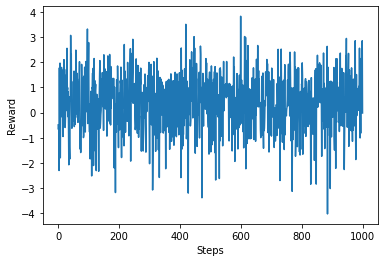

In [33]:
# Plot the reward given for each action
plt.plot(rewards)
plt.xlabel('Steps')
plt.ylabel('Reward');

### Exercise: Multi-armed bandits

[【强化学习】多臂老虎机——E_greedy、UCB、Gradient Bandit 算法 代码实现](https://blog.csdn.net/weixin_45839693/article/details/111307638)

a) Change the `Agent`-class in order to implement an $\varepsilon$-greedy agent. To do this, change the `learn`-method to implement the update of $Q$ given an action with corresponding reward. Then implement the $\varepsilon$-greedy policy in the `act`-function.\
更改`Agent`类以实现$\varepsilon$-greedy agent。为此，改变`learn`方法来实现更新$Q$，并给予相应的奖励。然后在`act`函数中实现$\varepsilon$-greedy策略。

b) Try to run your agent with e.g. $\varepsilon = 0.1$.\
尝试使用$\varepsilon = 0.1$运行你的agent。

d) When you have tested that your implementation, you can run the code below to reproduce plots like in Figure 2.2 in the textbook. Here we do 2000 runs using the agent, and then take the average reward at different time steps. The code may take some minute to run!\
当您测试了您的实现之后，您可以运行下面的代码来重现教科书中如图2.2所示的图。这里我们使用代理进行2000次运行，然后在不同的时间步骤中获取平均奖励。代码可能需要几分钟才能运行！

In [34]:
epsilon = 0.1 # Change this to try different values
rewards = np.zeros((2000, 1000)) 

for i in range(2000):
    agent = Agent(epsilon = epsilon)
    env.reset()
    
    for t in range(1000):
        action = agent.act()
        state, reward, done, info = env.step(action)
        rewards[i,t] = reward
        agent.learn(action, reward) 

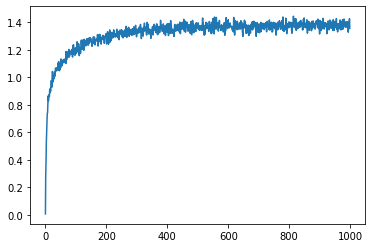

In [35]:
mean_rewards = np.mean(rewards, 0)
plt.plot(mean_rewards)